In [67]:
import sys 
sys.path.append('../fsp')
import stochCalc
import numpy as np
import matplotlib.pyplot as plt

$dR(t) = (\alpha - \beta R(t)) dt + \sigma \sqrt{R(t)} dW(t)$

with $\beta = 1$, $\alpha = 0.10 \beta$, $r = 0.05$, $\sigma = 0.5$.

2A: 

Using the derivation from Q4:

$d log R = (\frac{1}{R} \tilde \alpha(t,R(t)) + \frac{1}{2} \frac{-1 }{R^2} \tilde \sigma(t, R(t))^2)dt + \frac{1}{R} \tilde \sigma(t, R(t)) dW(t)$

where $\tilde \alpha(t,R(t)) = (\alpha - \beta R(t))$ and $ \tilde \sigma(t, R(t)) = \sigma \sqrt{R(t)} $

$d log R = (\frac{1}{R} (\alpha - \beta R(t)) + \frac{1}{2} \frac{-1 }{R^2} (\sigma \sqrt{R(t)})^2)dt + \frac{1}{R} (\sigma \sqrt{R(t)}) dW(t)$

So where $X = log R$, $R = e^{X}$: 

$$ dX = (e^{-X} (\alpha - \beta e^X) + \frac{1}{2} -e^{2X} (\sigma e^{0.5 X})^2)dt + e^{-R} ( \sigma e^{0.5 X}) dW(t) $$

$$ dX = (-X + \alpha - \beta e^X + \frac{1}{2} - \sigma^2 e^X)dt + (-\sigma e^{\frac{1}{2}X} dW(t)) $$




The number of Bad Path's Generated  6


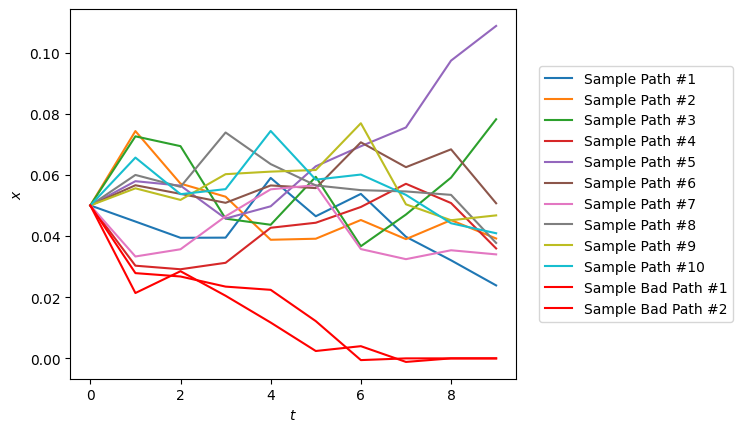

In [68]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta(x : float) -> float:
    return alpha - (x * beta)

def Gamma(x : float) -> float:
    return sigma * np.sqrt(x)
fig, ax = plt.subplots()

cir = stochCalc.SDE(X0=r, lambda_t=0.01, N=10, Beta=Beta, Gamma=Gamma)
paths = cir.getValidPaths(M=1000, greaterThanZero=False)
path_summary = []

path_0 = []
path_1 = []
path_2 = []
path_3 = []
path_4 = []
path_5 = []
path_6 = []
path_7 = []
path_8 = []
path_9 = []


for i, pather in enumerate(paths):
    path_0.append(np.exp(pather[0]))
    path_1.append(pather[1])
    path_2.append(pather[2])
    path_3.append(pather[3])
    path_4.append(pather[4])
    path_5.append(pather[5])
    path_6.append(pather[6])
    path_7.append(pather[7])
    path_8.append(pather[8])
    path_9.append(pather[9])
    
    if i < 10:
        
        ax.plot(pather, label="Sample Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")

print("The number of Bad Path's Generated ", cir.badPathCounter)

for i, path in enumerate(cir.badPathsSample):
    if i < 2:
        ax.plot(path, c="r", label="Sample Bad Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")
        ax.legend()
    

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))



In [69]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_straight_mean = []
stats_straight_std = []
for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_straight_mean.append(np.mean(index))
    stats_straight_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.05041863919960377  and std= 0.011029241718692732
The sample mean/std at time n= 2  is mean= 0.05107475169795977  and std= 0.015794978057561904
The sample mean/std at time n= 3  is mean= 0.050881911870868025  and std= 0.01929936642988724
The sample mean/std at time n= 4  is mean= 0.05165019641675208  and std= 0.02242642724155751
The sample mean/std at time n= 5  is mean= 0.051848045887718755  and std= 0.024388944667903964
The sample mean/std at time n= 6  is mean= 0.05241434208806261  and std= 0.027506262506838425
The sample mean/std at time n= 7  is mean= 0.05241434208806261  and std= 0.027506262506838425
The sample mean/std at time n= 8  is mean= 0.05278083320377679  and std= 0.03030680704403369
The sample mean/std at time n= 9  is mean= 0.05387490309548154  and std= 0.03313792395754571
The sample mean/std at time n= 10  is mean= 0.054744197256986746  and std= 0.03475213986663837


$$ dX = (-X + \alpha - \beta e^X + \frac{1}{2} - \sigma^2 e^X)dt + (-\sigma e^{\frac{1}{2}X} dW(t)) $$


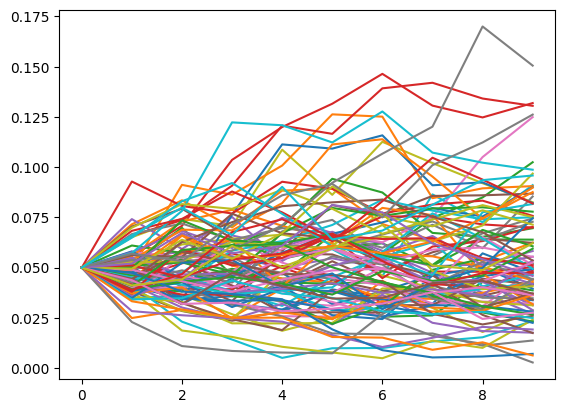

In [70]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta_log(x):
    y = (np.exp(-x) * (alpha - 0.5 * sigma**2)) - beta
    return y
def Gamma_log(x):
    y = sigma * np.exp(-0.5 * x) #* 2
    return y

fig, ax = plt.subplots()

cir = stochCalc.SDE_Efficient(X0=np.log(r), lambda_t=0.01, N=10, M=100)
cir.walk(Beta_log, Gamma_log)
ax.plot(np.exp(cir.X.T))

In [71]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_log_mean = []
stats_log_std = []

for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_log_mean.append(np.mean(index))
    stats_log_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.05041863919960377  and std= 0.011029241718692732
The sample mean/std at time n= 2  is mean= 0.05107475169795977  and std= 0.015794978057561904
The sample mean/std at time n= 3  is mean= 0.050881911870868025  and std= 0.01929936642988724
The sample mean/std at time n= 4  is mean= 0.05165019641675208  and std= 0.02242642724155751
The sample mean/std at time n= 5  is mean= 0.051848045887718755  and std= 0.024388944667903964
The sample mean/std at time n= 6  is mean= 0.05241434208806261  and std= 0.027506262506838425
The sample mean/std at time n= 7  is mean= 0.05241434208806261  and std= 0.027506262506838425
The sample mean/std at time n= 8  is mean= 0.05278083320377679  and std= 0.03030680704403369
The sample mean/std at time n= 9  is mean= 0.05387490309548154  and std= 0.03313792395754571
The sample mean/std at time n= 10  is mean= 0.054744197256986746  and std= 0.03475213986663837


[0.05       0.05001641 0.05069217 0.05111245 0.0518715  0.05175588
 0.05210648 0.05271084 0.05365459 0.05352078]


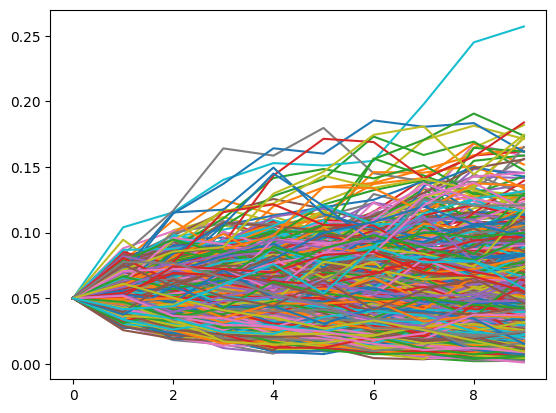

In [72]:
reg = stochCalc.SDE_Efficient(X0=np.log(r), lambda_t=(0.01), N=10, M=1000)
reg.walk(Beta_log, Gamma_log)
plt.plot(np.exp(reg.X.T))
stats_log_mean = np.mean(np.exp(reg.X[:,:].T), axis=1)
print(stats_log_mean)
plt.show()

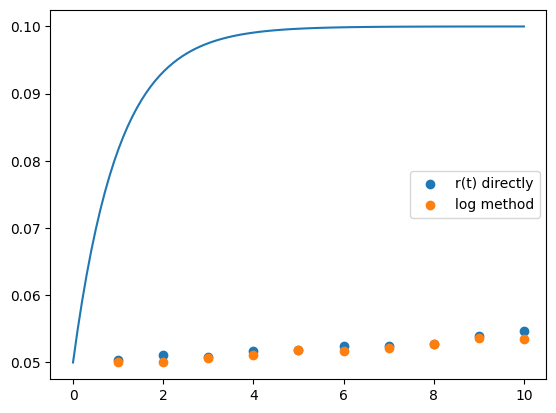

In [73]:
#graph this line
def rt_mean(x):
    return np.exp(-beta * x)*r + (alpha/beta) * (1-np.exp(-beta * x))
def rt_var(x):
    return ((sigma**2) / beta) * r * (np.exp(-beta * x) - np.exp(-2 * beta * x)) + ((alpha * sigma**2)/2 * beta**2) * (1-2*np.exp(-2*beta*x) - np.exp(-2*beta*x))

x_vals = np.linspace(0,10,100)

plt.plot(x_vals, rt_mean(x_vals))
plt.scatter(range(1,11), stats_straight_mean, label="r(t) directly")
plt.scatter(range(1,11), stats_log_mean, label="log method")
plt.legend()

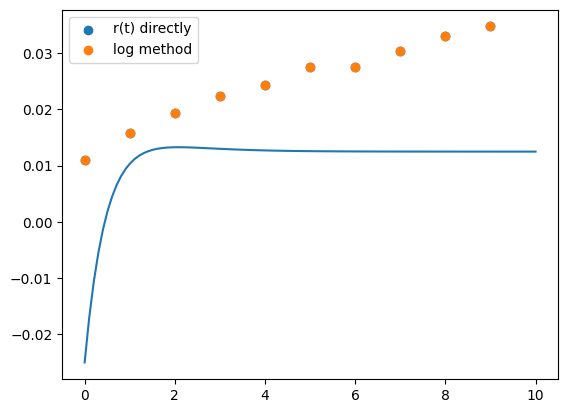

In [74]:
plt.plot(x_vals, rt_var(x_vals))
plt.scatter(range(0,10), stats_straight_std, label="r(t) directly")
plt.scatter(range(0,10), stats_log_std, label="log method")
plt.legend()